In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [86]:
df = pd.read_csv('SG_usedcar.csv')
df.head(3)

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,RoadTax,DeregValue,COE,EngineCap,CurbWeight,Manufactured,Transmission,OMV,ARF,Power,NoOfOwners,Price,Stroka
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,N.A,N.A,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN


In [88]:
#df.loc[df['Stroka'].isnull(),'Stroka']=0
columns = ['Mileage','Dep','RoadTax','Price','OMV','Power','ARF','Manufactured','EngineCap','COE','DeregValue']
for j in columns:
    for i in list(df['Type'].unique()):
        med = df[(df['Type']==i) & (df[j]!='N.A') & (df[j]!='N.A.')][j].median()
        if not(med >0):
            med = 0
        if df[(df['Type']==i) & ((df[j]=='10yrs COE left)')|(df[j]=='5yrs COE left)'))]['COE'].sum()<=0:
            med = df[(df['Type']==i) & ((df['COE']!='N.A')&(df['COE']!='N.A.'))]['COE'].median()
        df.loc[(df['Type']==i) & ((df[j]=='N.A') | (df[j]=='N.A.') | (df[j]=='NaN')),j]=int(med)

In [89]:
df.head()

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,RoadTax,DeregValue,COE,EngineCap,CurbWeight,Manufactured,Transmission,OMV,ARF,Power,NoOfOwners,Price,Stroka
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,50001,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,37766,37766,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),31783,31783,959,31783,25727,1591,1264,2009,Auto,10763,10763,89,3,31783,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,NaN


In [90]:
df['Coe_left_days'] = df['Coe_left']
df= df.reindex(columns=['Brand', 'Type', 'Reg_date', 'Coe_left','Coe_left_days', 'Dep', 'Mileage', 'RoadTax','DeregValue', 'COE', 'EngineCap', 'CurbWeight', 'Manufactured','Transmission', 'OMV', 'ARF', 'Power', 'NoOfOwners', 'Price','Stroka'])
def DtoD(i):
    i= ' '+i
    k = 0 if int(i.find('y'))>=4 or i.find('y')<0 else i[0:i.find('y')]
    p = 0 if i.find('m')<0 else i[i.find('m')-2:i.find('m')]
    j = 0 if i.find('d')<0 else i[i.find('d')-2:i.find('d')]
    return int(k)*365+int(p)*30+int(j)

df.loc[(df['Coe_left_days'].isnull()),'Coe_left_days']='0'

In [91]:
for i in range(0,4411):
    df.loc[[i],'Coe_left_days']=DtoD(list(df.loc[[i],'Coe_left_days'])[0])

In [92]:
df.head()

,Brand,Type,Reg_date,Coe_left,Coe_left_days,Dep,Mileage,RoadTax,DeregValue,COE,EngineCap,CurbWeight,Manufactured,Transmission,OMV,ARF,Power,NoOfOwners,Price,Stroka
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),716,15920,50001,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),1587,10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),3650,6280,110000,742,37766,37766,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),2800,31783,31783,959,31783,25727,1591,1264,2009,Auto,10763,10763,89,3,31783,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),566,8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,NaN


Median Price value: 60787
 Mean Price value: 81391
 Standart Deviation Price value:81816
Median OMV value: 26763
 Mean OMV value: 34312
 Standart Deviation OMV value:34383
Median EngineCap value: 1600
 Mean EngineCap value: 2020
 Standart Deviation EngineCap value:1350


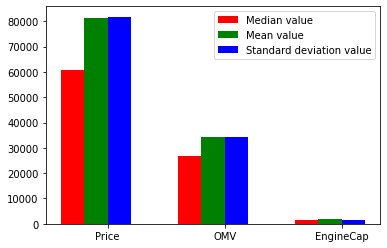

In [93]:
import numpy as np
l = []
for i in ['Price','OMV','EngineCap']:
    df[i] = list(map(lambda x:int(x),list(df[i].values)))
    med = int(df[i].median())
    mean = df[i].sum()//len(df[i].values)
    stdv = int(df[i].std())
    l.append([med,mean,stdv])
    print('Median {0} value: {1}\n Mean {0} value: {2}\n Standart Deviation {0} value:{3}'.format(i,med,mean,stdv))
fig, ax = plt.subplots()
width = 0.2
x = np.arange(len(l))
data_std = [[1, 2, 1, 2], [1, 2, 1, 2], [1, 2, 1, 2], 
            [1, 2, 1, 2], [1, 2, 1, 2], [1, 2, 1, 2]] 


ax.bar(x, [l[0][0],l[1][0],l[2][0]], width, color='red', label='Median value', yerr=data_std[0][0])
ax.bar(x + width, [l[0][1],l[1][1],l[2][1]], width, color='green', label='Mean value', yerr=data_std[0][1])
ax.bar(x + (2 * width), [l[0][2],l[1][2],l[2][2]], width, color='blue', label='Standard deviation value', yerr=data_std[0][2])

x_labels=['Price','OMV','EngineCap']
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.legend()
plt.show()

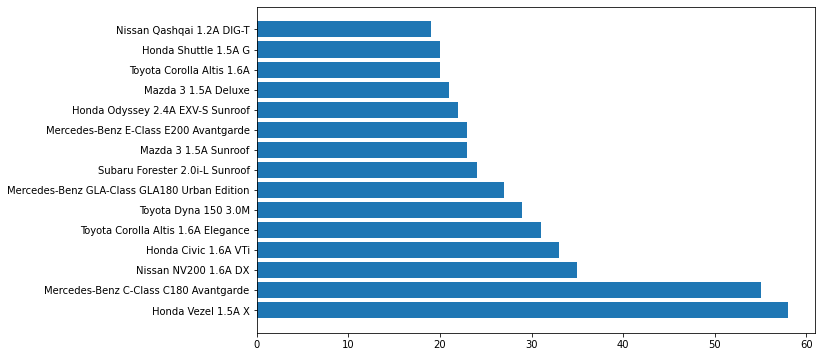

In [94]:
l = list(df['Brand'].value_counts())[:15]
l1 = list(df['Brand'].value_counts().reset_index()['index'])[:15]
fig, ax = plt.subplots()

ax.barh(l1, l)
fig.set_figwidth(10) 
fig.set_figheight(6)  

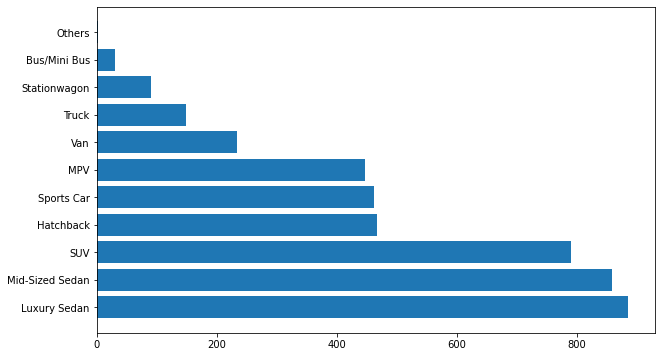

In [95]:
l1 = list(df['Type'].value_counts())
l = list(df['Type'].value_counts().reset_index()['index'])
plt.figure(figsize=[10,6])
plt.barh(l,l1)
plt.show()

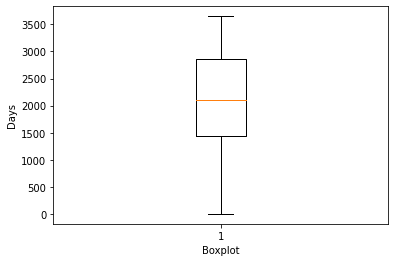

In [96]:
fig,ax=plt.subplots()
ax.boxplot(df['Coe_left_days'].values)
ax.set_xlabel('Boxplot')
ax.set_ylabel('Days')
plt.show()

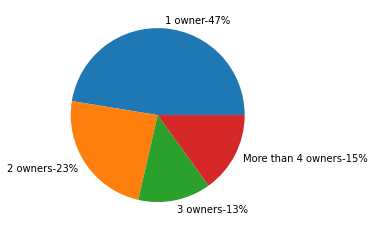

In [97]:
l = df[df['NoOfOwners']!='N.A']['NoOfOwners'].value_counts()
k= df[df['NoOfOwners']!='N.A']['NoOfOwners'].count()
l = [l[0],l[1],l[2],l[3:].sum()]
owners=['1 owner-'+str(int(l[0]/k*100))+'%','2 owners-'+str(int(l[1]/k*100))+'%','3 owners-'+str(int(l[2]/k*100))+'%','More than 4 owners-'+str(int(l[3]/k*100))+'%']
plt.pie(l,labels=owners)
plt.show()

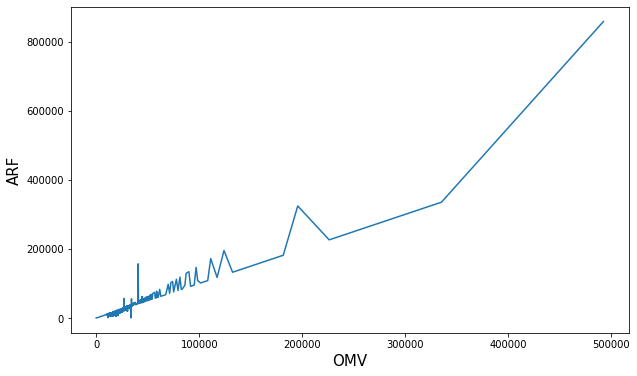

In [98]:
df['OMV'] = list(map(lambda x:int(x),list(df['OMV'].values)))
df['ARF'] = list(map(lambda x:int(x),list(df['ARF'].values)))
x= df.sort_values('OMV')['OMV'].values
y=df.sort_values('OMV')['ARF'].values

fig, ax=plt.subplots(figsize=[10,6])

ax.plot(x[::10],y[::10])
ax.set_xlabel("OMV", fontsize=15)
ax.set_ylabel("ARF", fontsize=15)
plt.show()

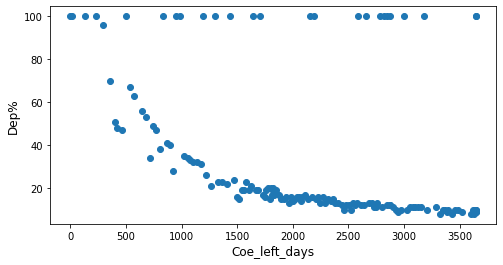

In [101]:
df['Dep'] = list(map(lambda x:int(x),list(df['Dep'].values)))
df['Price'] = list(map(lambda x:int(x),list(df['Price'].values)))
df['Dep%']=list(map(lambda x,y: int(x/y*100),df['Dep'].values,df['Price'].values))#Dep% - percentage of Dep from Price
df = df.reindex(columns=['Brand', 'Type', 'Reg_date', 'Coe_left','Coe_left_days', 'Dep','Dep%', 'Mileage', 'RoadTax','DeregValue', 'COE', 'EngineCap', 'CurbWeight', 'Manufactured','Transmission', 'OMV', 'ARF', 'Power', 'NoOfOwners', 'Price','Stroka'])
x = df.sort_values('Coe_left_days')['Coe_left_days'].values[::30]
y = df.sort_values('Coe_left_days')['Dep%'].values[::30]
fig, ax=plt.subplots(figsize=[8,4])

ax.scatter(x,y)
ax.set_xlabel("Coe_left_days", fontsize=12)
ax.set_ylabel("Dep%", fontsize=12)
plt.show()